# Evaluation of MFCC

In [3]:
import numpy as np
import scipy.io.wavfile
import scipy.signal
import matplotlib.pyplot as plt
import seaborn as sns
from python_speech_features import mfcc
from fastdtw import fastdtw
%matplotlib inline

# Whole song

In [4]:
filename = 'ba_example'
sr, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/{}_out.wav'.format(filename))

In [5]:
t_mf = mfcc(tutor, samplerate=sr, numcep=8)

In [6]:
print(np.min(t_mf, axis=0))
print(np.max(t_mf, axis=0))
print(np.max(t_mf, axis=0) - np.min(t_mf, axis=0))

[ 10.21074206 -29.16139319 -96.01472663 -13.67298071 -47.76331708
 -52.18595107 -27.02075636 -49.37253422]
[ 20.47607117   5.54361949 -31.15721375  52.20406423  24.04355348
  12.43901335  19.30340436  36.70071046]
[ 10.26532911  34.70501268  64.85751288  65.87704494  71.80687056
  64.62496442  46.32416072  86.07324468]


In [7]:
m_mf = mfcc(ba_learnt, samplerate=sr, numcep=8)

In [8]:
print(np.min(m_mf, axis=0))
print(np.max(m_mf, axis=0))
print(np.max(m_mf, axis=0) - np.min(t_mf, axis=0))

[ 16.94783971 -44.80298606 -90.13569943 -16.50856784 -19.11624125
 -18.00703058 -28.30046729 -18.81171886]
[  2.35064635e+01   8.47767160e+00  -3.20763172e-14   1.83551361e+01
   3.66928830e+01   8.45929634e+00   2.00347105e+01   1.89732858e+01]
[ 13.29572143  37.63906479  96.01472663  32.02811677  84.45620008
  60.64524741  47.05546689  68.34582001]


In [9]:
fastdtw(t_mf, m_mf)[0]

88.9393049001537

# Just syllable A

In [273]:
filename = 'ba_syllable_a'
sr1, tutor = scipy.io.wavfile.read('../data/{}.wav'.format(filename))
sr, ba_learnt = scipy.io.wavfile.read('../data/{}_out.wav'.format(filename))

In [274]:
t_mf = mfcc(tutor, samplerate=sr1,  winlen=0.01, winstep=0.003, numcep=13)[..., 1:]

In [275]:
print(np.min(t_mf, axis=0))
print(np.max(t_mf, axis=0))
print(np.max(t_mf, axis=0) - np.min(t_mf, axis=0))

[-13.80148538 -79.67509481 -14.44942319 -21.65188968 -12.79596948
  -4.99086799 -24.03193831   2.41447456 -17.89173727 -23.64977873
  -6.60827933 -22.84647156]
[ 14.04343954 -43.79222785  22.69004866  -1.47705042   3.55830929
  26.51834861   4.2357374   31.83211496   7.75165565   8.49019479
   9.95295051  13.59522746]
[ 27.84492491  35.88286696  37.13947184  20.17483926  16.35427878
  31.5092166   28.26767571  29.41764039  25.64339292  32.13997352
  16.56122984  36.44169902]


In [276]:
m_mf = mfcc(ba_learnt, samplerate=sr,  winlen=0.01, winstep=0.003, numcep=13)[..., 1:]

In [277]:
print(np.min(m_mf, axis=0))
print(np.max(m_mf, axis=0))
print(np.max(m_mf, axis=0) - np.min(t_mf, axis=0))

[-10.64330274 -69.82293141  -0.89595792   1.74973942 -11.79954997
 -14.02543968  -7.74283157 -10.17218664 -12.86578931 -14.34423238
  -6.43591432  -2.46610127]
[ 13.87404045   2.32734369  24.35615347  25.5265775   12.67118101
  12.36821417  13.1825202   11.84914297   0.83794134   0.81738923
   8.84172046  15.62756124]
[ 27.67552583  82.0024385   38.80557665  47.17846719  25.46715049
  17.35908216  37.2144585    9.43466841  18.72967861  24.46716797
  15.4499998   38.4740328 ]


In [278]:
fastdtw(t_mf, m_mf, dist=2)[0]

968.2547332303426

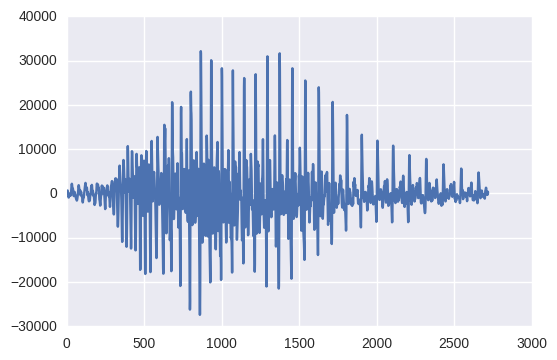

In [279]:
plt.plot(tutor)

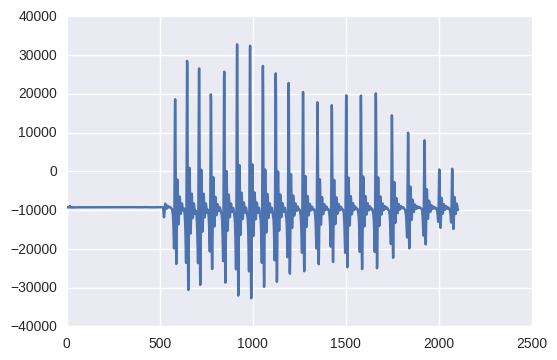

In [280]:
plt.plot(ba_learnt)

In [259]:
noisy_t = np.random.normal(0, 10, len(tutor)) + tutor

In [201]:
snt = np.concatenate((np.zeros(0), tutor))

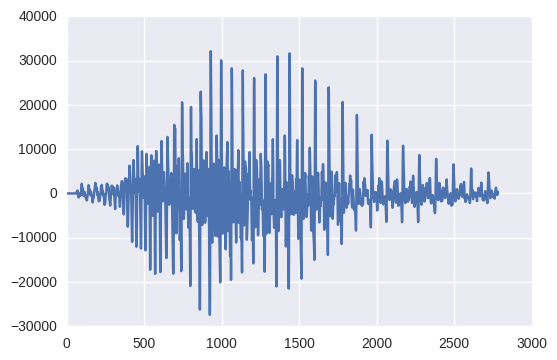

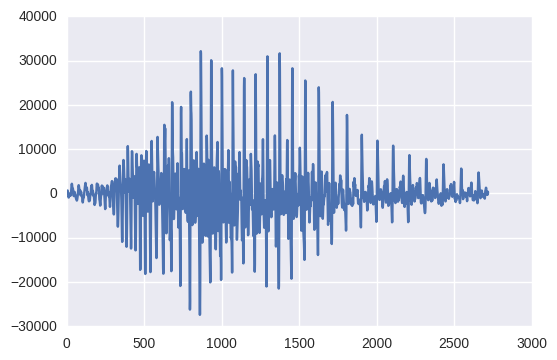

In [245]:
plt.plot(snt)
plt.show()
plt.plot(tutor)
plt.show()

In [202]:
nt_mf = mfcc(noisy_t, samplerate=sr1,  winlen=0.01, winstep=0.003, numcep=13)[..., 1:]
snt_mf = mfcc(snt, samplerate=sr1,  winlen=0.001, winstep=0.003, numcep=13)[..., 1:]

In [203]:
np.linalg.norm(t_mf - snt_mf[:], ord=2)

0.0

In [204]:
fastdtw(t_mf, snt_mf, dist=2, radius=10)

(0.0,
 [(0, 0),
  (1, 1),
  (2, 2),
  (3, 3),
  (4, 4),
  (5, 5),
  (6, 6),
  (7, 7),
  (8, 8),
  (9, 9),
  (10, 10),
  (11, 11),
  (12, 12),
  (13, 13),
  (14, 14),
  (15, 15),
  (16, 16)])

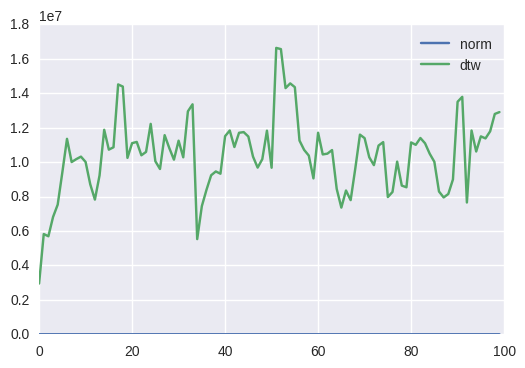

In [266]:
res = np.zeros((100, 2))
for i in range(100):
    snt = np.concatenate((np.zeros(i), tutor))
    snt_mf = mfcc(snt, samplerate=sr1)[..., 1:]
    res[i, 0] = np.linalg.norm(t_mf[:min(len(t_mf), len(snt_mf))] - snt_mf[:min(len(t_mf), len(snt_mf))], ord=2)
    res[i, 1] = fastdtw(tutor, snt)[0]
plt.plot(res[:, 0], label='norm')
plt.plot(res[:, 1], label='dtw')
plt.legend()

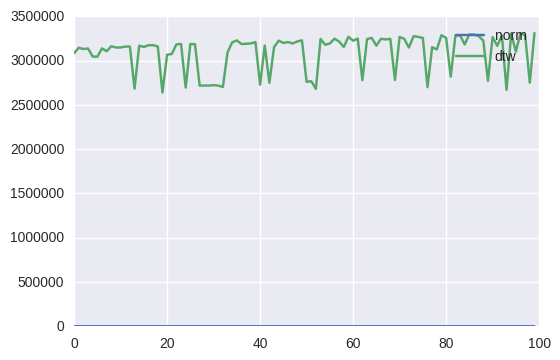

In [263]:
res = np.zeros((100, 2))
for i in range(100):
    snt = np.random.normal(0, i+1, len(tutor)) + tutor
    snt_mf = mfcc(snt, samplerate=sr1)[..., 1:]
    res[i, 0] = np.linalg.norm(t_mf[:min(len(t_mf), len(snt_mf))] - snt_mf[:min(len(t_mf), len(snt_mf))], ord=2)
    res[i, 1] = fastdtw(snt, tutor)[0]
plt.plot(res[:, 0], label='norm')
plt.plot(res[:, 1], label='dtw')
plt.legend()

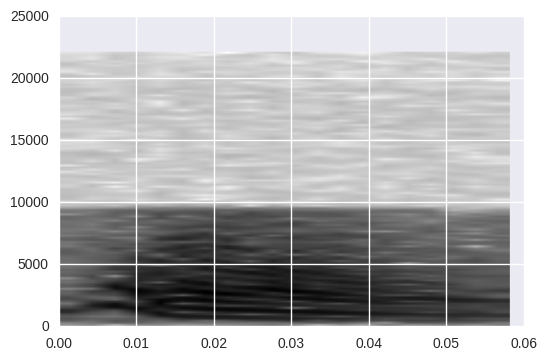

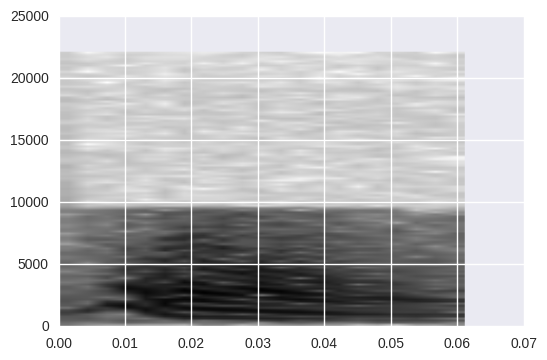

In [253]:
plt.specgram(tutor, Fs=sr)
plt.show()
plt.specgram(snt, Fs=sr)
plt.show()